# Lab Assignment 4

**Computer Vision** - Term 5, 2022

Instructor: Dr. Saumya Jetly <br>
TA: Ribhu Lahiri

*Deadline: Wednesday, 23 March 2022 11:59 pm* 

Submission form link: https://forms.gle/B9m2khtKNStHLCLL8

Total points: 5


In [26]:
# Imports
import math
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Task 1: Creating the single layer perceptron (3 points)

In this lab we will focus on the perceptron, and how it can be used to model logic gates. Further, this same idea can be extended further due to perceptrons being a universal function approximator

**Implement the `sigmoid` function** *(1 point)*

$𝑆(x) = \frac{1}{1 + e^{-x}}$



In [27]:
def sigmoid(x):
  '''
    Applies the sigmoid function to the given input

    Parameters
    ----------
    x: torch.Tensor
        Input array/tensor

    Returns
    -------
    out: torch.Tensor
        Tensor after applying sigmoid function to it
  '''
  return 1.0/(1+torch.exp(-x))

**Implement the `perceptron` function** *(1 point)*

$y' = x \bullet W^t + b$

In [28]:
def perceptron(inputs, weights, bias):
  '''
    Defines the single layer perceptron model
  '''
  h = torch.add(inputs@ torch.transpose(weights,1,0),  bias)
  return sigmoid(h)

**Implement the `binary_cross_entropy` function** *(1 point)*

$\mathrm{Loss} = - \frac{1}{\mathrm{N}} \sum_{i=1}^{\mathrm{N}} y_i \cdot \mathrm{log}\; {\hat{y}}_i + (1-y_i) \cdot \mathrm{log}\; (1-{\hat{y}}_i)$

In [80]:
def binary_cross_entropy(preds, targets):
  '''
    Applies binary cross entropy given predictions and ground truth
  '''
  bce = -1 * (torch.sum(((1 - targets) * torch.log(1 - preds)) + (targets * torch.log(preds))).mean())
  return bce

## AND Gate

In [81]:
and_data = np.array([[0,0,0],
                     [0,1,0],
                     [1,0,0],
                     [1,1,1]])

# Creating a PyTorch tensor
and_data = torch.Tensor(and_data)

In [82]:
# Same slicing as np arrays
X = and_data[:,:-1]
y = and_data[:,-1:]

In [83]:
W = torch.randn((1,2), requires_grad=True)
b = torch.randn((1,1), requires_grad=True)

**Create the training loop** *(1 point)*

In [84]:
n_epochs = 100
lr = 5e-1
losses = []
for epoch in range(n_epochs):
  y_pred = perceptron(X,W,b)
  loss = binary_cross_entropy(y_pred, y)
  loss.backward()

  with torch.no_grad():
      W -= lr* W.grad
      b -= lr* b.grad
      W.grad.zero_()
      b.grad.zero_()

  losses.append(loss.item())

[3.5147547721862793, 2.6578431129455566, 2.4121599197387695, 2.23268985748291, 2.0804057121276855, 1.9487240314483643, 1.8340094089508057, 1.7333831787109375, 1.644497036933899, 1.5654388666152954, 1.4946551322937012, 1.4308825731277466, 1.3730896711349487, 1.3204317092895508, 1.272212028503418, 1.2278530597686768, 1.1868739128112793, 1.1488707065582275, 1.1135026216506958, 1.0804800987243652, 1.0495562553405762, 1.0205183029174805, 0.9931832551956177, 0.9673914909362793, 0.9430040121078491, 0.9198987483978271, 0.8979684114456177, 0.8771180510520935, 0.8572627305984497, 0.8383275866508484, 0.8202451467514038, 0.8029541969299316, 0.7864009141921997, 0.7705351114273071, 0.7553125023841858, 0.7406920194625854, 0.7266367673873901, 0.7131125330924988, 0.7000880241394043, 0.6875348091125488, 0.675426721572876, 0.6637388467788696, 0.6524492502212524, 0.6415368318557739, 0.6309821605682373, 0.6207677125930786, 0.6108763813972473, 0.601292610168457, 0.5920019149780273, 0.5829907655715942, 0.574

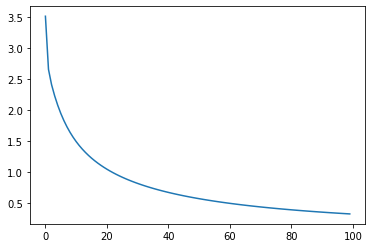

In [85]:
print(losses)
plt.plot(losses)

In [86]:
with torch.no_grad():
  print((perceptron(X, W, b) > 0.5).int())

tensor([[0],
        [0],
        [0],
        [1]], dtype=torch.int32)


## OR Gate

In [36]:
or_data = np.array([[0,0,0],
                     [0,1,1],
                     [1,0,1],
                     [1,1,1]])

# Creating a PyTorch tensor
or_data = torch.Tensor(or_data)

In [37]:
# Same slicing as np arrays
X = or_data[:,:-1]
y = or_data[:,-1:]

In [38]:
W = torch.randn((1,2), requires_grad=True)
b = torch.randn((1,1), requires_grad=True)

**Reuse the training loop**

In [40]:
n_epochs = 100
lr = 5e-1
losses = []
for _ in range(n_epochs):
  y_pred = perceptron(X,W,b)
  loss = binary_cross_entropy(y_pred, y)
  loss.backward()

  with torch.no_grad():
      W -= lr* W.grad
      b -= lr* b.grad
      W.grad.zero_()
      b.grad.zero_()

  losses.append(loss.item())

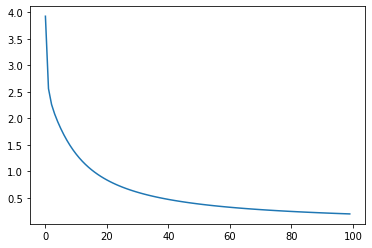

In [41]:
plt.plot(losses)

In [42]:
with torch.no_grad():
  print((perceptron(X, W, b) > 0.5).int())

tensor([[0],
        [1],
        [1],
        [1]], dtype=torch.int32)


## XOR Gate

In [43]:
xor_data = np.array([[0,0,0],
                     [0,1,1],
                     [1,0,1],
                     [1,1,0]])

# Creating a PyTorch tensor
xor_data = torch.Tensor(xor_data)

In [44]:
# Same slicing as np arrays
X = xor_data[:,:-1]
y = xor_data[:,-1:]

In [45]:
W = torch.randn((1,2), requires_grad=True)
b = torch.randn((1,1), requires_grad=True)

**Reuse the training loop**

In [46]:
n_epochs = 100
lr = 5e-1
losses = []
for _ in range(n_epochs):
  y_pred = perceptron(X,W,b)
  loss = binary_cross_entropy(y_pred, y)
  loss.backward()

  with torch.no_grad():
      W -= lr* W.grad
      b -= lr* b.grad
      W.grad.zero_()
      b.grad.zero_()

  losses.append(loss.item())

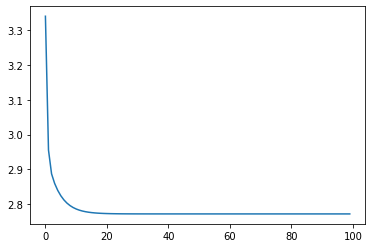

In [47]:
plt.plot(losses)

In [48]:
with torch.no_grad():
  print((perceptron(X, W, b) > 0.5).int())

tensor([[0],
        [0],
        [0],
        [1]], dtype=torch.int32)


## Need for MLP

As seen above, we are unable to model the XOR gate using a single layer perceptron, so we need to add a hidden layer.

In [64]:
W1 = torch.randn((10,2), requires_grad=True)
W2 = torch.randn((1,10), requires_grad=True)
b1 = torch.randn((1,10), requires_grad=True)
b2 = torch.randn((1,1), requires_grad=True)

**Implement the `mlp` function** *(1 point)*

In [65]:
def mlp(inputs, W1, W2, b1, b2):
  '''
    Defines the multi-layer perceptron model

    Note: Only 1 hidden layer
  '''
  yhat = perceptron(inputs,W1,b1) #Layer 1
  y_pred = perceptron(yhat,W2,b2) #Layer 2

  return y_pred

**Reuse the training loop**

NOTE: It will require slight modification due to the hidden layer

In [66]:
n_epochs = 1000
lr = 5e-1
losses = []
for _ in range(n_epochs):
  y_pred = mlp(X, W1, W2, b1, b2)

  # calculating the bce loss
  loss = binary_cross_entropy(y_pred, y)

  loss.backward()

  # Updating the weights and biases
  with torch.no_grad():
      W1 -= lr* W1.grad
      W2 -= lr* W2.grad
      b1 -= lr* b1.grad
      b2 -= lr* b2.grad
      W1.grad.zero_()
      b1.grad.zero_()
      W2.grad.zero_()
      b2.grad.zero_()
  losses.append(loss.item())

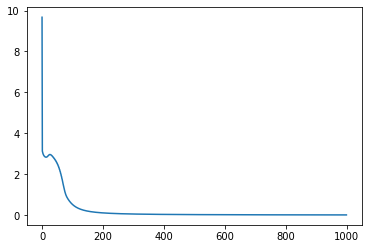

In [67]:
plt.plot(losses)

In [63]:
with torch.no_grad():
  print((mlp(X, W1, W2, b1, b2) > 0.5).int())

tensor([[0],
        [0],
        [0],
        [0]], dtype=torch.int32)
